<a href="https://colab.research.google.com/github/Kumarvels/AI-Complete-Learning-Plan/blob/main/ColQwen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using ColQwen2 with transformers

ColQwen2, state-of-the-art visual document retrieval model is now in transformers!

Here's a notebook to show how to do similarity/retrieval with it. Let's install transformers from main for now.

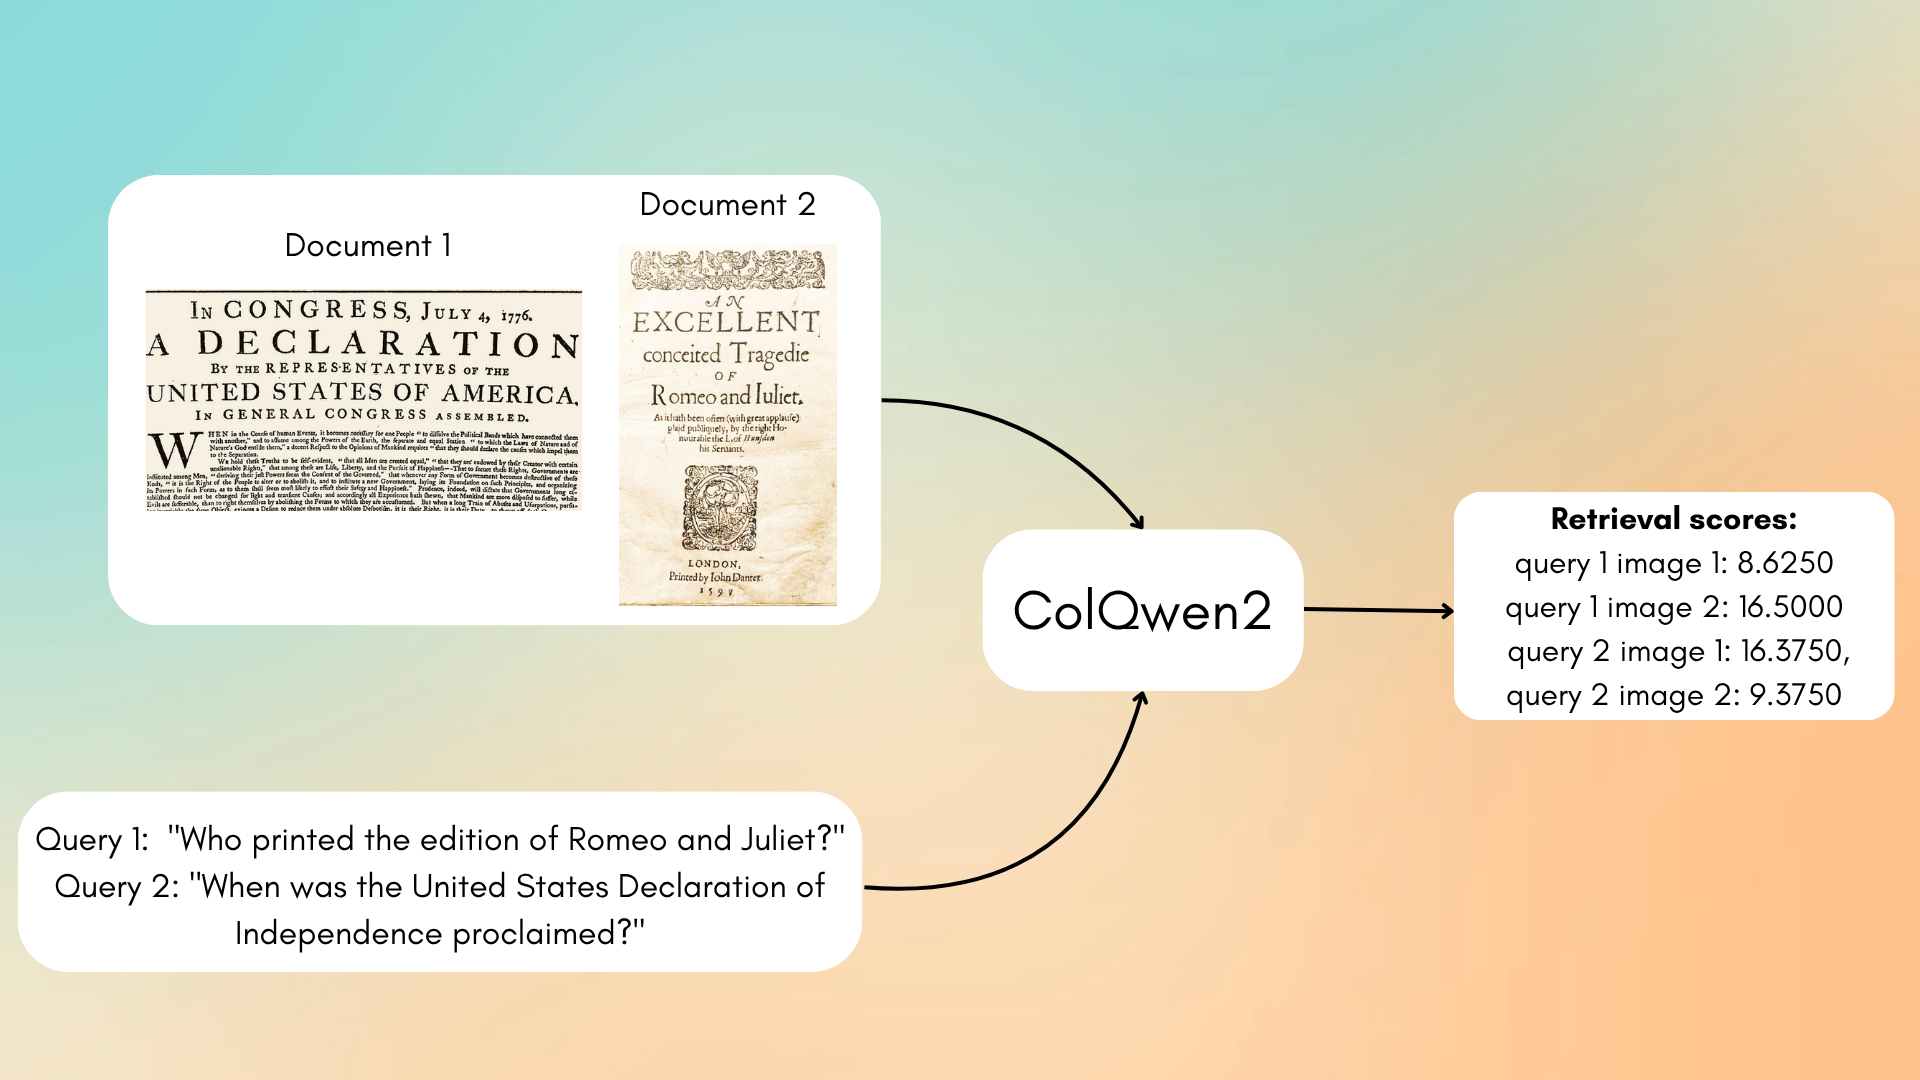

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 71.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

You can use `ColQwen2ForRetrieval` and `ColQwen2Processor` to load the model and processor in transformers.

In [ ]:
from transformers import ColQwen2ForRetrieval, ColQwen2Processor
import torch

model_name = "vidore/colqwen2-v1.0-hf"

model = ColQwen2ForRetrieval.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    attn_implementation="flash_attention_2",
)
processor = ColQwen2Processor.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/6.08k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/4.42G [00:00<?, ?B/s]

You are attempting to use Flash Attention 2.0 without specifying a torch dtype. This might lead to unexpected behaviour


preprocessor_config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

Let's load the images.

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/8/89/US-original-Declaration-1776.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Romeoandjuliet1597.jpg/500px-Romeoandjuliet1597.jpg


--2025-06-02 15:18:24--  https://upload.wikimedia.org/wikipedia/commons/8/89/US-original-Declaration-1776.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161116 (157K) [image/jpeg]
Saving to: ‘US-original-Declaration-1776.jpg’

US-original-Declara 100%[===================>] 157.34K  --.-KB/s    in 0.05s   

2025-06-02 15:18:24 (2.99 MB/s) - ‘US-original-Declaration-1776.jpg’ saved [161116/161116]

--2025-06-02 15:18:24--  https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Romeoandjuliet1597.jpg/500px-Romeoandjuliet1597.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98494 (96K) [image/jpeg]
Savin

Preprocess our inputs.

In [ ]:
from PIL import Image

from transformers.utils.import_utils import is_flash_attn_2_available


images = [
    Image.open("/content/500px-Romeoandjuliet1597.jpg"),
    Image.open("/content/US-original-Declaration-1776.jpg"),
]

queries = [
    "When was the United States Declaration of Independence proclaimed?",
    "Who printed the edition of Romeo and Juliet?",
]

# Process the inputs
inputs_images = processor(images=images).to(model.device)
inputs_text = processor(text=queries).to(model.device)

We can now infer.

In [ ]:
# Forward pass
with torch.no_grad():
    image_embeddings = model(**inputs_images).embeddings
    query_embeddings = model(**inputs_text).embeddings

# Score the queries against the images
scores = processor.score_retrieval(query_embeddings, image_embeddings)

print("Retrieval scores (query x image):")
print(scores)

Retrieval scores (query x image):
tensor([[ 8.6250, 16.5000],
        [16.3750,  9.3750]], dtype=torch.bfloat16)


As you can see, the first image is most similar to second text prompt and the second image is the most similar to first prompt!

To learn more, check out [the model repository](https://huggingface.co/vidore/colqwen2-v1.0) and the [transformers docs](https://huggingface.co/docs/transformers/main/en/model_doc/colqwen2).